In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble, metrics 
import gc

In [2]:
df = pd.read_csv('C:\\Users\\WELCOME\\Desktop\\harddrive.csv')

In [3]:
df.head(10)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,1.976651e-311,0,100,0,134.0,101.0,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01,MJ1323YNG1TJ7C,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,100.0,0.0,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01,S300Z6K9,ST4000DM000,1.976651e-311,0,107,13985080,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01,S300Z6K8,ST4000DM000,1.976651e-311,0,116,109242152,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01,Z302PGH8,ST4000DM000,1.976651e-311,0,112,46112000,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2016-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,135.0,108.0,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,Z305B2QN,ST4000DM000,1.976651e-311,0,113,54551400,NaN,NaN,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,MJ0351YNG9Z7LA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,136.0,104.0,137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,WD-WMC4N2899475,WDC WD30EFRX,1.482490e-311,0,200,0,NaN,NaN,175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,1.976651e-311,0,100,0,134.0,101.0,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01,MJ1323YNG1TJ7C,Hitachi HDS5C3030ALA630,1.482490e-311,0,100,0,100.0,0.0,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01,S300Z6K9,ST4000DM000,1.976651e-311,0,107,13985080,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01,S300Z6K8,ST4000DM000,1.976651e-311,0,116,109242152,NaN,NaN,97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01,Z302PGH8,ST4000DM000,1.976651e-311,0,112,46112000,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

date                          0
serial_number                 0
model                         0
capacity_bytes                0
failure                       0
smart_1_normalized            0
smart_1_raw                   0
smart_2_normalized      1920177
smart_2_raw             1920177
smart_3_normalized            0
smart_3_raw                   0
smart_4_normalized            0
smart_4_raw                   0
smart_5_normalized            0
smart_5_raw                   0
smart_7_normalized            0
smart_7_raw                   0
smart_8_normalized      1920171
smart_8_raw             1920171
smart_9_normalized            0
smart_9_raw                   0
smart_10_normalized           0
smart_10_raw                  0
smart_11_normalized     3032481
smart_11_raw            3032481
smart_12_normalized           0
smart_12_raw                  0
smart_13_normalized     3179289
smart_13_raw            3179289
smart_15_normalized     3179295
                         ...   
smart_20

In [6]:
np.int64(df['capacity_bytes'].at[5])

0

Dropping all the cells that has all of its value as Null

In [7]:
print(df['capacity_bytes'].at[5])
print(df['capacity_bytes'].at[5] * 10**10)

1.97665142786e-311
1.97665142786e-301


In [8]:
# drop constant columns
hdd = df.loc[:, ~df.isnull().all()]

In [9]:
# number of different types of harddrives
hdd['model'].value_counts().shape

(69,)

Failures according to models

In [10]:
print(hdd.groupby('model')['failure'].sum().sort_values(ascending=False).iloc[:30])

model
ST4000DM000                139
ST320LT007                  15
Hitachi HDS722020ALA330     13
WDC WD800AAJS                6
WDC WD30EFRX                 6
Hitachi HDS5C3030ALA630      5
Hitachi HDS5C4040ALE630      4
WDC WD20EFRX                 3
ST3160318AS                  2
ST4000DX000                  2
WDC WD10EADS                 2
HGST HMS5C4040ALE640         2
WDC WD1600AAJS               2
WDC WD1600AAJB               2
ST6000DX000                  2
ST3160316AS                  1
TOSHIBA MD04ABA500V          1
WDC WD3200BEKT               1
TOSHIBA DT01ACA300           1
WDC WD3200BEKX               1
ST9250315AS                  1
HGST HMS5C4040BLE640         1
WDC WD60EFRX                 1
WDC WD800AAJB                1
WDC WD800BB                  1
ST3500320AS                  0
ST31500341AS                 0
ST31500541AS                 0
WDC WD800LB                  0
ST250LT007                   0
Name: failure, dtype: int64


In [11]:
# ST4000DM000 refers to Seagate SATA 6Gb/s 3.5-Inch 4TB Desktop HDD 
# Since it makes up a majority of the data, and the features should be the same for 
# drives of the same model, we will start by predicting failure in these drives. 
# combining them with other similar seagate drives might be an easy way to use more of the data

hdd_st4 = hdd.query('model == "ST4000DM000"')

In [12]:
del hdd
gc.collect()

892

In [13]:
# number of drives in the reduced data
hdd_st4['serial_number'].value_counts().shape

(35057,)

In [14]:
# out of the 35k drives there are 131 failures, so this is definitly an imbalanced dataset. 
# note the output says 139 1 labeled but this is incorrect as 8 are duplicates. I drop them later
# because dropping at the begginning crashed the Kernel
hdd_st4['failure'].value_counts()

0    1681334
1        139
Name: failure, dtype: int64

In [15]:
# more constant columns
hdd_st4['capacity_bytes'].value_counts()

1.976651e-311    1681473
Name: capacity_bytes, dtype: int64

In [16]:
# drop them 
hdd_st4 = hdd_st4.loc[:, ~hdd_st4.isnull().all()]

In [17]:
hdd_st4.shape

(1681473, 53)

In [18]:
# these have similar exponents as the size of harddrive. 
# I am also pretty sure these variables are something like total read or total write. 
# The scientific format is interprating the exponents as negative when they should likely be positive
# A fractional byte does not make sense. 
hdd_st4.iloc[:5,13:15] 

,smart_7_normalized,smart_7_raw
1,63,1.279800e-317
7,83,1.017278e-315
8,81,7.266557e-316
9,84,1.488203e-315
10,87,2.371728e-314


In [19]:
# removed normalized values, and model, and capacity, since they are constants
hdd_st4 = hdd_st4.select(lambda x: x[-10:] != 'normalized', axis=1)
hdd_st4 = hdd_st4.drop(['model', 'capacity_bytes'], axis=1)
gc.collect()

139

In [20]:
# no null values left. 
# thanks to the scripts by Alan Pryor(https://www.kaggle.com/apryor6) foor this and other nice ways of doing things 
hdd_st4.isnull().any()

date             False
serial_number    False
failure          False
smart_1_raw      False
smart_3_raw      False
smart_4_raw      False
smart_5_raw      False
smart_7_raw      False
smart_9_raw      False
smart_10_raw     False
smart_12_raw     False
smart_183_raw    False
smart_184_raw    False
smart_187_raw    False
smart_188_raw    False
smart_189_raw    False
smart_190_raw    False
smart_191_raw    False
smart_192_raw    False
smart_193_raw    False
smart_194_raw    False
smart_197_raw    False
smart_198_raw    False
smart_199_raw    False
smart_240_raw    False
smart_241_raw    False
smart_242_raw    False
dtype: bool

In [21]:
# turns number into a string, then extracts, base and exponent
def convert_large_number(large_num, min_exponent):
    str_num = str(large_num)
    
    base_end = str_num.find('e')
    base  = np.float64((str_num[:base_end]))
    
    # if i remember correctly this is equivelent to dividing by a constant
    exponent = np.int64(str_num[base_end+2:]) - (min_exponent-1)
    return base*10**exponent

# just fetches the exponent
def get_exp(large_num):
    str_num = str(large_num)
    base_end = str_num.find('e')
    
    exponent = np.int64(str_num[base_end+2:])
        
    return exponent

# finds the minimum exponenet for a series
def min_exp(series_of_large_num):
    exps = series_of_large_num.apply(get_exp)
    return exps.min()

# scales a series down but subtracting the min observed exponent from exponent.  
def scale_large_num_col(series, min_exponent):
    return series.apply(convert_large_number, min_exponent=min_exponent)

In [22]:
# smart_241_raw contains a single 0 which messes up my method of conversion
s241_mean = hdd_st4['smart_241_raw'].mean()
hdd_st4['smart_241_raw'].replace(0.0, s241_mean, inplace=True)

In [23]:
# transform data so it is a more managable size
# alternativly they could be stored as full length integers
for i in range(3, len(hdd_st4.columns)):
    if hdd_st4.iloc[0,i] < 10**-10 and hdd_st4.iloc[0,i] > 0:
       hdd_st4.iloc[:,i] =  scale_large_num_col(hdd_st4.iloc[:,i], 308)

In [24]:
gc.collect()
hdd_st4.head()

,date,serial_number,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_10_raw,...,smart_191_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
1,2016-01-01,Z305B2QN,0,54551400,0,4,0,1.279800e+10,411,0,...,0.0,0.0,16090.0,30.0,0,0,0,1.320000e+14,3.467963e+08,1.316882e+08
7,2016-01-01,S300Z6K9,0,13985080,0,3,0,1.017278e+08,5506,0,...,0.0,0.0,31005.0,26.0,0,0,0,2.656000e+13,1.123662e+06,1.761059e+07
8,2016-01-01,S300Z6K8,0,109242152,0,3,0,7.266557e+09,4016,0,...,0.0,0.0,38958.0,27.0,0,0,0,1.830000e+13,9.029058e+07,2.551732e+07
9,2016-01-01,Z302PGH8,0,46112000,0,16,0,1.488203e+08,5130,0,...,0.0,2.0,203.0,20.0,0,0,0,2.533600e+13,5.856105e+07,2.356922e+06
10,2016-01-01,Z3023VGH,0,117245752,0,7,0,2.371728e+07,10639,0,...,0.0,1.0,32440.0,25.0,0,0,0,5.188700e+13,8.240600e+07,6.064623e+06


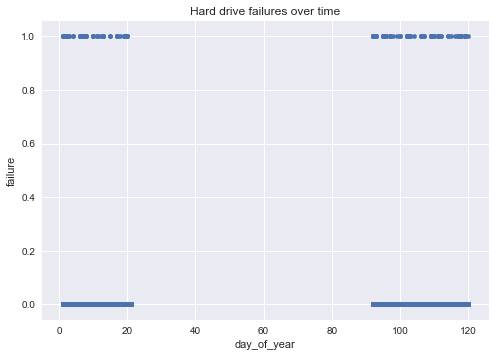

In [25]:
# Since we are trying to predict drive failure, we randomly select a set of drives. 
# note that if there is some relationship between the drives, say a large group are in the same building. Then failure 
# between drives won't be indepentent

hdd_st4.loc[:, 'date'] = pd.to_datetime(hdd_st4.loc[:,'date'])
hdd_st4['day_of_year'] = hdd_st4['date'].dt.dayofyear

hdd_st4.plot(kind='scatter', x='day_of_year', y='failure', title='Hard drive failures over time')
plt.show()

In [26]:
# note this could be done earlier but it doesn't work on Kernels because of memory limitations
hdd_st4 = hdd_st4.drop_duplicates()

In [27]:
# lets try to predict the probability of failure from data only on the day of failure
# it would be good to see how this probability relates to the probability of failure using previous days data only
hdd_group = hdd_st4.groupby('serial_number')
hdd_last_day = hdd_group.nth(-1) # take the last row from each group
del hdd_st4
gc.collect()

5242

In [28]:
# the number of drives in the dataset
uniq_serial_num = pd.Series(hdd_last_day.index.unique())
uniq_serial_num.shape

(35057,)

In [29]:
# hold out 25% of data for testing
test_ids = uniq_serial_num.sample(frac=0.25)

In [30]:
train = hdd_last_day.query('index not in @test_ids')
test = hdd_last_day.query('index in @test_ids')

In [31]:
test['failure'].value_counts()

0    8736
1      28
Name: failure, dtype: int64

In [32]:
train['failure'].value_counts()

0    26190
1      103
Name: failure, dtype: int64

In [33]:
train_labels = train['failure']
test_labels = test['failure']
train = train.drop('failure', axis=1)
test = test.drop('failure', axis=1)

In [34]:
train['day_of_year'].value_counts()

120    26025
21       136
118       30
111        7
102        7
92         5
17         5
10         5
6          5
117        4
2          4
109        4
13         4
7          3
1          3
97         3
19         3
93         3
96         3
119        3
4          2
11         2
106        2
114        2
3          2
110        2
103        2
20         2
100        2
8          2
95         2
115        1
104        1
116        1
15         1
18         1
107        1
12         1
112        1
99         1
Name: day_of_year, dtype: int64

In [35]:
# the last day has most of the data without failures. This makes sense because I chose
# to use the last day as a feature and most drives are still working on last day.
# in this dataset date, and by extension number of samples will be a leak, as those 
# harddrives which failed in the dataset will likely have less days available. 
print(train_labels.reindex(train.query('day_of_year == 120').index).shape[0],
      train_labels.reindex(train.query('day_of_year == 120').index).sum())

26025 0


In [36]:
# 
print(train_labels.reindex(train.query('day_of_year != 120').index).shape[0],
      train_labels.reindex(train.query('day_of_year != 120').index).sum())

268 103


In [37]:
#drop date related features maybe this will prevent leakage;)
train = train.drop(['day_of_year', 'date'], axis=1)
test = test.drop(['day_of_year', 'date'] , axis=1)

In [38]:
# remove more constant columns(anyone have a fast one liner for this?)
# could have done this earlier
for i in train.columns:
    if len(train.loc[:,i].unique()) == 1:
        train.drop(i, axis=1, inplace=True)
        test.drop(i, axis=1, inplace=True)

In [39]:
train.head().columns

Index(['smart_12_raw', 'smart_183_raw', 'smart_184_raw', 'smart_187_raw',
       'smart_188_raw', 'smart_189_raw', 'smart_190_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_1_raw', 'smart_240_raw', 'smart_241_raw',
       'smart_242_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw',
       'smart_9_raw'],
      dtype='object')

In [40]:
rf = ensemble.RandomForestClassifier()
rf.fit(train, train_labels)
preds = rf.predict_proba(test)

In [41]:
print('logloss', metrics.log_loss(y_true=test_labels, y_pred=preds[:,1]))
print('roc_auc', metrics.roc_auc_score(y_true=test_labels, y_score=preds[:,1]))

logloss 0.047472967995
roc_auc 0.800104657248


In [42]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
LogReg = LogisticRegression()

In [44]:
LogReg.fit(train, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = LogReg.predict(test)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels, y_pred)
confusion_matrix

array([[8736,    0],
       [  28,    0]])

In [47]:
print(classification_report(test_labels, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8736
          1       0.00      0.00      0.00        28

avg / total       0.99      1.00      1.00      8764



C:\Users\WELCOME\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_pred)

In [50]:
roc_auc = auc(false_positive_rate, true_positive_rate)

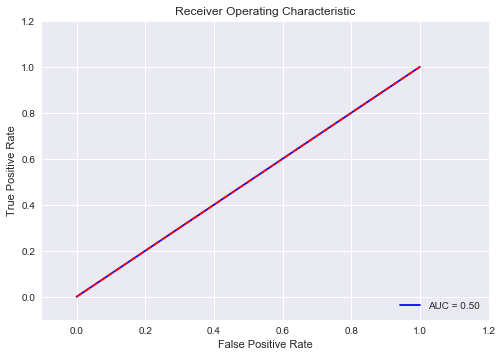

In [51]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We could see the above classifier does worst job of classifying our data set.

Its Time to go deep!!!

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM
from keras.optimizers import SGD

Using TensorFlow backend.


In [53]:
model = Sequential()

In [54]:
def prepare_dataset(train,test,train_labels,test_labels):
    train_X = train.values.reshape((train.shape[0], 1, train.shape[1]))
    test_X = test.values.reshape((test.shape[0], 1, test.shape[1]))
#     train_X = train.reshape((train.shape[0], 1, train.shape[1]))
#     test_X = test.reshape((test.shape[0], 1, test.shape[1]))
    print(train_X.shape, train_labels.shape, test_X.shape, test_labels.shape)
    return train_X,test_X

In [55]:
train_X,test_X = prepare_dataset(train,test,train_labels,test_labels)

(26293, 1, 21) (26293,) (8764, 1, 21) (8764,)


Train on 26293 samples, validate on 8764 samples
Epoch 1/50
2s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 2/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 3/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 4/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 5/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 6/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 7/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 8/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 9/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 10/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 11/50
1s - loss: 15.8799 - acc: 0.0039 - val_loss: 15.8914 - val_acc: 0.0032
Epoch 12/50
1s - loss: 15.8799 - acc: 0.0039 - 

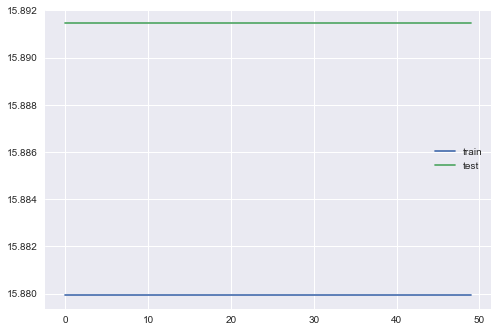

In [56]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_labels, epochs=50, batch_size=50, validation_data=(test_X, test_labels), verbose=2, shuffle=False)
# plot history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Trying with different parameters

Train on 26293 samples, validate on 8764 samples
Epoch 1/75
2s - loss: 0.0137 - acc: 0.9955 - val_loss: 0.0124 - val_acc: 0.9961
Epoch 2/75
1s - loss: 0.0112 - acc: 0.9956 - val_loss: 0.0078 - val_acc: 0.9966
Epoch 3/75
1s - loss: 0.0110 - acc: 0.9957 - val_loss: 0.0074 - val_acc: 0.9967
Epoch 4/75
1s - loss: 0.0108 - acc: 0.9956 - val_loss: 0.0073 - val_acc: 0.9967
Epoch 5/75
1s - loss: 0.0106 - acc: 0.9957 - val_loss: 0.0117 - val_acc: 0.9968
Epoch 6/75
1s - loss: 0.0105 - acc: 0.9957 - val_loss: 0.0072 - val_acc: 0.9968
Epoch 7/75
1s - loss: 0.0105 - acc: 0.9957 - val_loss: 0.0070 - val_acc: 0.9968
Epoch 8/75
1s - loss: 0.0104 - acc: 0.9958 - val_loss: 0.0069 - val_acc: 0.9968
Epoch 9/75
1s - loss: 0.0104 - acc: 0.9959 - val_loss: 0.0070 - val_acc: 0.9968
Epoch 10/75
1s - loss: 0.0103 - acc: 0.9959 - val_loss: 0.0113 - val_acc: 0.9968
Epoch 11/75
1s - loss: 0.0103 - acc: 0.9959 - val_loss: 0.0068 - val_acc: 0.9968
Epoch 12/75
1s - loss: 0.0103 - acc: 0.9959 - val_loss: 0.0070 - val_

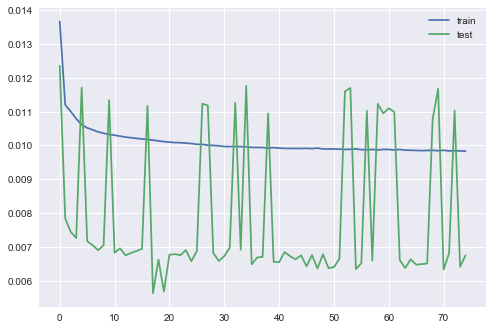

In [59]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='rmsprop',metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_labels, epochs=75, batch_size=50, validation_data=(test_X, test_labels), verbose=2, shuffle=False)
# plot history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train on 26293 samples, validate on 8764 samples
Epoch 1/75
1s - loss: 0.0913 - acc: 0.9204 - val_loss: 0.0102 - val_acc: 0.9968
Epoch 2/75
1s - loss: 0.0103 - acc: 0.9957 - val_loss: 0.0106 - val_acc: 0.9968
Epoch 3/75
1s - loss: 0.0097 - acc: 0.9959 - val_loss: 0.0063 - val_acc: 0.9968
Epoch 4/75
1s - loss: 0.0093 - acc: 0.9958 - val_loss: 0.0075 - val_acc: 0.9968
Epoch 5/75
0s - loss: 0.0091 - acc: 0.9959 - val_loss: 0.0090 - val_acc: 0.9968
Epoch 6/75
0s - loss: 0.0089 - acc: 0.9959 - val_loss: 0.0111 - val_acc: 0.9968
Epoch 7/75
0s - loss: 0.0088 - acc: 0.9960 - val_loss: 0.0079 - val_acc: 0.9968
Epoch 8/75
0s - loss: 0.0087 - acc: 0.9961 - val_loss: 0.0094 - val_acc: 0.9968
Epoch 9/75
0s - loss: 0.0086 - acc: 0.9961 - val_loss: 0.0103 - val_acc: 0.9968
Epoch 10/75
0s - loss: 0.0086 - acc: 0.9961 - val_loss: 0.0074 - val_acc: 0.9968
Epoch 11/75
0s - loss: 0.0085 - acc: 0.9961 - val_loss: 0.0038 - val_acc: 0.9968
Epoch 12/75
0s - loss: 0.0085 - acc: 0.9961 - val_loss: 0.0114 - val_

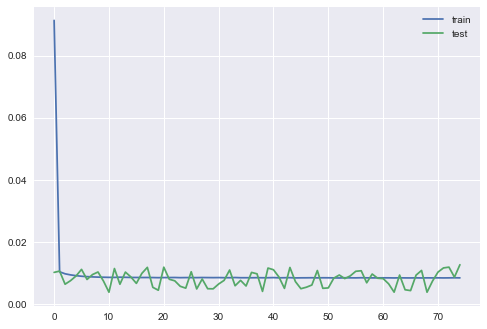

In [60]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.add(Dropout(0.1))
model.compile(loss='mae', optimizer='rmsprop',metrics=['accuracy'])
# fit network
history = model.fit(train_X, train_labels, epochs=75, batch_size=72, validation_data=(test_X, test_labels), verbose=2, shuffle=False)
# plot history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()